In [1]:
# Import modules
from sklearn import tree
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### Perfect Data Set

In [2]:
# Read CSV
data_df = pd.read_csv('Data\Perfect_AviationData.csv') 

# Display DF
data_df

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,State,Country,Latitude,Longitude,Airport_Code,...,Number_of_Engines,Engine_Type,Purpose_of_Flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_of_Flight,Report_Status
0,20081126X30503,Accident,WPR09LA046,11/25/2008,Monterey,CA,United States,36.586944,-121.842777,MRY,...,1.0,Reciprocating,Personal,0.0,1.0,1.0,0.0,VMC,DESCENT,Probable Cause
1,20081024X13647,Accident,CEN09LA034,10/24/2008,Breckenridge,TX,United States,32.718889,-98.891111,BKD,...,1.0,Reciprocating,Personal,0.0,2.0,0.0,0.0,VMC,GO-AROUND,Probable Cause
2,20081020X12359,Accident,CEN09LA024,10/19/2008,Angleton,TX,United States,29.248889,-95.328056,KLBX,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,APPROACH,Probable Cause
3,20081011X02304,Accident,WPR09LA009,10/10/2008,Placerville,CA,United States,38.724167,-120.753333,PVF,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,GO-AROUND,Probable Cause
4,20081006X90954,Accident,WPR09LA004,10/5/2008,Sandy Valley,NV,United States,35.795000,-115.627223,3L2,...,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,MANEUVERING,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,20070806X01122,Accident,NYC07LA134,6/8/2007,Gallatin,TN,United States,36.406667,-86.358889,M33,...,1.0,Reciprocating,Business,0.0,2.0,2.0,0.0,VMC,DESCENT,Probable Cause
119,20070614X00729,Accident,MIA07LA102,5/27/2007,Hayden,AL,United States,33.925278,-86.870000,NONE,...,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,LANDING,Probable Cause
120,20070624X00785,Accident,NYC07LA125,5/23/2007,Leesburg,VA,United States,39.063611,-77.636666,JYO,...,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,VMC,CRUISE,Probable Cause
121,20070508X00524,Accident,LAX07FA150,5/3/2007,Dillon,MT,United States,45.253333,-112.548889,DLN,...,2.0,Turbo Jet,Personal,2.0,0.0,0.0,0.0,VMC,APPROACH,Probable Cause


In [3]:
# Define target (Also called as Y)
target = data_df["Investigation_Type"]
# target_plo
target.head()

0    Accident
1    Accident
2    Accident
3    Accident
4    Accident
Name: Investigation_Type, dtype: object

In [4]:
#  Encode Target values for Random Forest Model

## Get the unique list of Investigation_type
unique_target = list(data_df["Investigation_Type"].unique())

# Create an encoder and fit on unique values
target_encoder = preprocessing.LabelEncoder()
target_encoder.fit(unique_target)

# Transform all target values with encoder and store as list
ecoded_target_list = list(target_encoder.transform(target))

# Create a final_target with encoded values
encoded_target_df = pd.DataFrame({"Investigation_Type" : ecoded_target_list})
final_target = encoded_target_df["Investigation_Type"]
final_target

0      0
1      0
2      0
3      0
4      0
      ..
118    0
119    0
120    0
121    0
122    0
Name: Investigation_Type, Length: 123, dtype: int64

In [5]:
# Getting the data
data_df = data_df.drop("Investigation_Type", axis=1)
data_df

,Event_Id,Accident_Number,Event_Date,Location,State,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Number_of_Engines,Engine_Type,Purpose_of_Flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_of_Flight,Report_Status
0,20081126X30503,WPR09LA046,11/25/2008,Monterey,CA,United States,36.586944,-121.842777,MRY,Monterey Peninsula Airport,...,1.0,Reciprocating,Personal,0.0,1.0,1.0,0.0,VMC,DESCENT,Probable Cause
1,20081024X13647,CEN09LA034,10/24/2008,Breckenridge,TX,United States,32.718889,-98.891111,BKD,Stephens County,...,1.0,Reciprocating,Personal,0.0,2.0,0.0,0.0,VMC,GO-AROUND,Probable Cause
2,20081020X12359,CEN09LA024,10/19/2008,Angleton,TX,United States,29.248889,-95.328056,KLBX,Brazoria County Airport,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,APPROACH,Probable Cause
3,20081011X02304,WPR09LA009,10/10/2008,Placerville,CA,United States,38.724167,-120.753333,PVF,Placerville Airport,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,GO-AROUND,Probable Cause
4,20081006X90954,WPR09LA004,10/5/2008,Sandy Valley,NV,United States,35.795000,-115.627223,3L2,Sky Ranch Airport,...,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,MANEUVERING,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,20070806X01122,NYC07LA134,6/8/2007,Gallatin,TN,United States,36.406667,-86.358889,M33,Sumner County,...,1.0,Reciprocating,Business,0.0,2.0,2.0,0.0,VMC,DESCENT,Probable Cause
119,20070614X00729,MIA07LA102,5/27/2007,Hayden,AL,United States,33.925278,-86.870000,NONE,Private,...,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,LANDING,Probable Cause
120,20070624X00785,NYC07LA125,5/23/2007,Leesburg,VA,United States,39.063611,-77.636666,JYO,Leesburg Municipal Airport,...,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,VMC,CRUISE,Probable Cause
121,20070508X00524,LAX07FA150,5/3/2007,Dillon,MT,United States,45.253333,-112.548889,DLN,Dillon,...,2.0,Turbo Jet,Personal,2.0,0.0,0.0,0.0,VMC,APPROACH,Probable Cause


In [6]:
# Define the input value columns(also called as X)
data = data_df[[
                'Injury_Severity', 'Aircraft_Damage', 'Total_Fatal_Injuries',
                'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured'
                ]]

# Display data DF
data

,Injury_Severity,Aircraft_Damage,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
0,Non-Fatal,Substantial,0.0,1.0,1.0,0.0
1,Non-Fatal,Destroyed,0.0,2.0,0.0,0.0
2,Non-Fatal,Substantial,0.0,0.0,0.0,1.0
3,Non-Fatal,Substantial,0.0,0.0,0.0,2.0
4,Fatal,Substantial,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
118,Non-Fatal,Substantial,0.0,2.0,2.0,0.0
119,Fatal,Substantial,1.0,0.0,0.0,0.0
120,Non-Fatal,Substantial,0.0,0.0,1.0,0.0
121,Fatal,Destroyed,2.0,0.0,0.0,0.0


In [7]:
# List of column names which has string values
col_list = ['Injury_Severity', 'Aircraft_Damage']

# Iterate through each column in col_list and create a encoded values for that column
for col in col_list:
    # Get the list of unique values from column
    unique = list(data[col].unique())
    
    # Create a LabelEncoder
    encoder = preprocessing.LabelEncoder()
    
    # Store the encoder in unique variable depending on the column name
    if col == 'Injury_Severity':
        le_Injury_Severity = encoder
        
    elif col == 'Aircraft_Damage':
        le_Aircraft_Damage = encoder
      
    # Fit the encoder on unique values    
    encoder.fit(unique)
    
    # Get the column values to list
    col_data_list = data[col].tolist()
    
    # Transform column values to encoded form
    ecoded_list = list(encoder.transform(col_data_list))
    
    # Add encoded values as new column in df
    new_col_name = col+'_Encoded'
    data[new_col_name] = ecoded_list

C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
# Display DF
data

,Injury_Severity,Aircraft_Damage,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Injury_Severity_Encoded,Aircraft_Damage_Encoded
0,Non-Fatal,Substantial,0.0,1.0,1.0,0.0,2,2
1,Non-Fatal,Destroyed,0.0,2.0,0.0,0.0,2,0
2,Non-Fatal,Substantial,0.0,0.0,0.0,1.0,2,2
3,Non-Fatal,Substantial,0.0,0.0,0.0,2.0,2,2
4,Fatal,Substantial,1.0,0.0,0.0,0.0,0,2
...,...,...,...,...,...,...,...,...
118,Non-Fatal,Substantial,0.0,2.0,2.0,0.0,2,2
119,Fatal,Substantial,1.0,0.0,0.0,0.0,0,2
120,Non-Fatal,Substantial,0.0,0.0,1.0,0.0,2,2
121,Fatal,Destroyed,2.0,0.0,0.0,0.0,0,0


In [9]:
# Creating final_data df with only required(Numeric value) columns 
final_data = data[[
                   'Injury_Severity_Encoded', 'Aircraft_Damage_Encoded', 'Total_Fatal_Injuries',
                   'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured'
                  ]]

# Display Final Data
final_data

,Injury_Severity_Encoded,Aircraft_Damage_Encoded,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
0,2,2,0.0,1.0,1.0,0.0
1,2,0,0.0,2.0,0.0,0.0
2,2,2,0.0,0.0,0.0,1.0
3,2,2,0.0,0.0,0.0,2.0
4,0,2,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
118,2,2,0.0,2.0,2.0,0.0
119,0,2,1.0,0.0,0.0,0.0
120,2,2,0.0,0.0,1.0,0.0
121,0,0,2.0,0.0,0.0,0.0


In [10]:
# Define feature_names to get the important features
feature_names = ['Injury_Severity_Encoded', 'Aircraft_Damage_Encoded',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured']
# final_data.columns

# Display feature names
feature_names

['Injury_Severity_Encoded',
 'Aircraft_Damage_Encoded',
 'Total_Fatal_Injuries',
 'Total_Serious_Injuries',
 'Total_Minor_Injuries',
 'Total_Uninjured']

##### Logistic_Regression 

In [11]:
# Perform train test split for logistic regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data, target, random_state=42)

In [12]:
# Scale data using StandardScalar
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

# Transform X values (Train & Test) with the scalar
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9891304347826086
Testing Data Score: 0.9354838709677419


C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
# Run Prediction in test data to get the predicted values for y(target)
y_pred = classifier.predict(X_test)
print(f"First 10 Predictions:   {y_pred[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Accident' 'Accident' 'Accident' 'Accident' 'Accident' 'Accident'
 'Accident' 'Accident' 'Accident' 'Accident']
First 10 Actual labels: ['Accident', 'Accident', 'Accident', 'Accident', 'Accident', 'Accident', 'Accident', 'Accident', 'Accident', 'Accident']


In [15]:
# Create df with predicted and actual values
pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Accident,Accident
1,Accident,Accident
2,Accident,Accident
3,Accident,Accident
4,Accident,Accident
5,Accident,Accident
6,Accident,Accident
7,Accident,Accident
8,Accident,Accident
9,Accident,Accident


In [16]:
# Display Confusion Matrix 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test, y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[29  0]
 [ 2  0]]
Classification Report:
              precision    recall  f1-score   support

    Accident       0.94      1.00      0.97        29
    Incident       0.00      0.00      0.00         2

   micro avg       0.94      0.94      0.94        31
   macro avg       0.47      0.50      0.48        31
weighted avg       0.88      0.94      0.90        31

Accuracy: 0.9354838709677419


C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### Random Forest Regression

In [17]:
# Perform train test split for random forest regression
from sklearn.model_selection import train_test_split
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(final_data, final_target, random_state=42)

In [18]:
# Scale data using StandardScalar
from sklearn.preprocessing import StandardScaler
X_scaler_random = StandardScaler().fit(X_train_random)

# Transform X values (Train & Test) with the scalar
X_train_random_scaled = X_scaler_random.transform(X_train_random)
X_test_random_scaled = X_scaler_random.transform(X_test_random)


C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_random_scaled, y_train_random)

print(f"Testing Data Score: {rf.score(X_test_random, y_test_random)}")
print(f"Training Data Score: {rf.score(X_train_random, y_train_random)}")

Testing Data Score: 0.9354838709677419
Training Data Score: 0.9891304347826086


In [20]:
#Run Prediction in test data to get the predicted values for y(target)
y_pred_random = list(rf.predict(X_test_random))
print(f"First 10 Predictions:   {y_pred_random[:10]}")
print(f"First 10 Actual labels: {y_test_random[:10].tolist()}")

First 10 Predictions:   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
First 10 Actual labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [21]:
# Create df with predicted and actual values
pd.DataFrame({"Prediction": y_pred_random, "Actual": y_test_random}).reset_index(drop=True)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [22]:
# Display Confusion Matrix 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result_random = confusion_matrix(y_test_random, y_pred_random)
print("Confusion Matrix:")
print(result_random)
result1_random = classification_report(y_test_random, y_pred_random)
print("Classification Report:",)
print (result1_random)
result2_random = accuracy_score(y_test_random, y_pred_random)
print("Accuracy:",result2_random)

Confusion Matrix:
[[29  0]
 [ 2  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       0.00      0.00      0.00         2

   micro avg       0.94      0.94      0.94        31
   macro avg       0.47      0.50      0.48        31
weighted avg       0.88      0.94      0.90        31

Accuracy: 0.9354838709677419


C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
# Display Feature names
print(feature_names)

['Injury_Severity_Encoded', 'Aircraft_Damage_Encoded', 'Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']


In [24]:
# Get the Important features
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.23904494195266754, 'Injury_Severity_Encoded'),
 (0.13575054545470086, 'Total_Uninjured'),
 (0.1104851936635491, 'Aircraft_Damage_Encoded'),
 (0.08492998670561462, 'Total_Fatal_Injuries'),
 (0.00437935688306288, 'Total_Serious_Injuries'),
 (0.00040997534040499746, 'Total_Minor_Injuries')]

In [25]:
# !pip install --upgrade scikit-learn==0.20.3

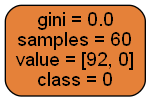

In [26]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()

export_graphviz(rf.estimators_[100], out_file=dot_data,
      filled=True, rounded=True,
      special_characters=True,feature_names = feature_names,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Accident_type_Tree.png')
Image(graph.create_png())

##### Data Set with Unknowns

In [27]:
# Read CSV
data_df = pd.read_csv('Data\Final_Clean_AviationData_US.csv')

# Display DF
data_df

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,State,Country,Latitude,Longitude,Airport_Code,...,Number_of_Engines,Engine_Type,Purpose_of_Flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_of_Flight,Report_Status
0,20200509X11853,Accident,CEN20LA173,5/9/2020,Haskell,OK,United States,35.864167,-95.655556,2K9,...,0.0,Unknown,Personal,0.0,1.0,0.0,0.0,VMC,DESCENT,Preliminary
1,20200508X55730,Accident,CEN20CA176,5/8/2020,San Antonio,TX,United States,29.723334,-98.694444,5C1,...,0.0,Unknown,Personal,0.0,0.0,0.0,0.0,Unknown,Unknown,Preliminary
2,20200507X60215,Accident,CEN20CA174,5/6/2020,Gonazales,TX,United States,29.529167,-97.464167,T20,...,1.0,Unknown,Personal,0.0,0.0,0.0,2.0,VMC,Unknown,Preliminary
3,20200509X85739,Accident,ERA20CA175,5/3/2020,Shirley,NY,United States,40.828056,-72.865556,HWV,...,1.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Unknown,Preliminary
4,20200504X54503,Incident,ENG20IA031,5/3/2020,Clewiston,FL,United States,26.735000,-81.051111,Unknown,...,1.0,Turbo Shaft,Personal,0.0,0.0,0.0,1.0,Unknown,Unknown,Preliminary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28801,20020904X01525,Accident,SEA83FA208,9/9/1983,Kalispell,MT,United States,48.120000,-113.887500,Unknown,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,CRUISE,Probable Cause
28802,20051208X01953,Accident,SEA83LA209,1/8/1983,Goldendale,WA,United States,46.041111,-120.849722,Unknown,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,VMC,CRUISE,Probable Cause
28803,20080417X00504,Accident,MIA08CA076,3/16/1982,Mobile,AL,United States,30.757778,-88.355555,MOB,...,1.0,Reciprocating,Unknown,1.0,0.0,0.0,0.0,IMC,LANDING,Probable Cause
28804,20170710X52551,Accident,NYC79AA106,9/17/1979,Boston,MA,United States,42.445277,-70.758333,Unknown,...,2.0,Turbo Fan,Unknown,0.0,0.0,1.0,44.0,VMC,CLIMB,Probable Cause


In [28]:
# Define target (Also called as Y)
target = data_df["Investigation_Type"]
target.head()

0    Accident
1    Accident
2    Accident
3    Accident
4    Incident
Name: Investigation_Type, dtype: object

In [29]:
#  Encode Target values for Random Forest Model

## Get the unique list of Investigation_type
unique_target = list(data_df["Investigation_Type"].unique())

# Create an encoder and fit on unoque values
target_encoder = preprocessing.LabelEncoder()
target_encoder.fit(unique_target)

# Transform all target values with encoder and store as list
ecoded_target_list = list(target_encoder.transform(target))

# Create a final_target with encoded values
encoded_target_df = pd.DataFrame({"Investigation_Type" : ecoded_target_list})
final_target = encoded_target_df["Investigation_Type"]
final_target

0        0
1        0
2        0
3        0
4        1
        ..
28801    0
28802    0
28803    0
28804    0
28805    0
Name: Investigation_Type, Length: 28806, dtype: int64

In [30]:
# Define the input value columns(also called as X)

data = data_df[[
                'Injury_Severity', 'Aircraft_Damage', 'Total_Fatal_Injuries',
                'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured'
                ]]

# Display data DF
data

,Injury_Severity,Aircraft_Damage,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
0,Non-Fatal,Substantial,0.0,1.0,0.0,0.0
1,Unavailable,Substantial,0.0,0.0,0.0,0.0
2,Non-Fatal,Substantial,0.0,0.0,0.0,2.0
3,Non-Fatal,Substantial,0.0,0.0,0.0,1.0
4,Incident,Unknown,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
28801,Fatal,Destroyed,2.0,0.0,0.0,0.0
28802,Fatal,Destroyed,2.0,0.0,0.0,0.0
28803,Fatal,Substantial,1.0,0.0,0.0,0.0
28804,Non-Fatal,Substantial,0.0,0.0,1.0,44.0


In [31]:
# List of column names which has string values
col_list = ['Injury_Severity', 'Aircraft_Damage']

# Iterate through each column in col_list and create a encoded values for that column
for col in col_list:
    # Get the list of unique values from column
    unique = list(data[col].unique())
    
    # Create a LabelEncoder
    encoder = preprocessing.LabelEncoder()
    
    # Store the encoder in unique variable depending on the column name
    if col == 'Injury_Severity':
        le_Injury_Severity = encoder
        
    elif col == 'Aircraft_Damage':
        le_Aircraft_Damage = encoder
      
    # Fit the encoder on unique values    
    encoder.fit(unique)
    
    # Get the column values to list
    col_data_list = data[col].tolist()
    
    # Transform column values to encoded form
    ecoded_list = list(encoder.transform(col_data_list))
    
    # Add encoded values as new column in df
    new_col_name = col+'_Encoded'
    data[new_col_name] = ecoded_list

C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [32]:
# Display DF
data

,Injury_Severity,Aircraft_Damage,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Injury_Severity_Encoded,Aircraft_Damage_Encoded
0,Non-Fatal,Substantial,0.0,1.0,0.0,0.0,2,2
1,Unavailable,Substantial,0.0,0.0,0.0,0.0,3,2
2,Non-Fatal,Substantial,0.0,0.0,0.0,2.0,2,2
3,Non-Fatal,Substantial,0.0,0.0,0.0,1.0,2,2
4,Incident,Unknown,0.0,0.0,0.0,1.0,1,3
...,...,...,...,...,...,...,...,...
28801,Fatal,Destroyed,2.0,0.0,0.0,0.0,0,0
28802,Fatal,Destroyed,2.0,0.0,0.0,0.0,0,0
28803,Fatal,Substantial,1.0,0.0,0.0,0.0,0,2
28804,Non-Fatal,Substantial,0.0,0.0,1.0,44.0,2,2


In [33]:
# Creating final_data df with only required(Numeric value) columns 
final_data = data[[
                   'Injury_Severity_Encoded', 'Aircraft_Damage_Encoded', 'Total_Fatal_Injuries',
                   'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured'
                  ]]

# Display Final Data
final_data

,Injury_Severity_Encoded,Aircraft_Damage_Encoded,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
0,2,2,0.0,1.0,0.0,0.0
1,3,2,0.0,0.0,0.0,0.0
2,2,2,0.0,0.0,0.0,2.0
3,2,2,0.0,0.0,0.0,1.0
4,1,3,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
28801,0,0,2.0,0.0,0.0,0.0
28802,0,0,2.0,0.0,0.0,0.0
28803,0,2,1.0,0.0,0.0,0.0
28804,2,2,0.0,0.0,1.0,44.0


In [34]:
# Define feature_names to get the important features
feature_names = final_data.columns

# Display feature names
feature_names

Index(['Injury_Severity_Encoded', 'Aircraft_Damage_Encoded',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured'],
      dtype='object')

##### Logistic_Regression 

In [35]:
# Perform train test split for logistic regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data, target, random_state=42)

In [36]:
# Scale data using StandardScalar
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

# Transform X values (Train & Test) with the scalar
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training Data Score: 0.9747731901499722
Testing Data Score: 0.9741738405998334


In [38]:
# Run Prediction in test data to get the predicted values for y(target)
y_pred = classifier.predict(X_test)
print(f"First 10 Predictions:   {y_pred[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Accident' 'Accident' 'Accident' 'Accident' 'Accident' 'Accident'
 'Accident' 'Accident' 'Accident' 'Accident']
First 10 Actual labels: ['Accident', 'Accident', 'Accident', 'Accident', 'Accident', 'Accident', 'Accident', 'Accident', 'Accident', 'Accident']


In [39]:
# Create df with predicted and actual values
pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Accident,Accident
1,Accident,Accident
2,Accident,Accident
3,Accident,Accident
4,Accident,Accident
...,...,...
7197,Accident,Accident
7198,Accident,Accident
7199,Accident,Accident
7200,Accident,Accident


In [40]:
# Display Confusion Matrix 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test, y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[6986   74]
 [ 112   30]]
Classification Report:
              precision    recall  f1-score   support

    Accident       0.98      0.99      0.99      7060
    Incident       0.29      0.21      0.24       142

   micro avg       0.97      0.97      0.97      7202
   macro avg       0.64      0.60      0.62      7202
weighted avg       0.97      0.97      0.97      7202

Accuracy: 0.9741738405998334


##### Random Forest Regression

In [41]:
# Perform train test split for random forest regression
from sklearn.model_selection import train_test_split
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(final_data, final_target, random_state=42)

In [42]:
# Scale data using StandardScalar
from sklearn.preprocessing import StandardScaler
X_scaler_random = StandardScaler().fit(X_train_random)

# Transform X values (Train & Test) with the scalar
X_train_random_scaled = X_scaler_random.transform(X_train_random)
X_test_random_scaled = X_scaler_random.transform(X_test_random)


C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_random_scaled, y_train_random)

print(f"Testing Data Score: {rf.score(X_test_random, y_test_random)}")
print(f"Training Data Score: {rf.score(X_train_random, y_train_random)}")

Testing Data Score: 0.9802832546514857
Training Data Score: 0.9764395482318089


In [44]:
#Run Prediction in test data to get the predicted values for y(target)
y_pred_random = list(rf.predict(X_test_random))
print(f"First 10 Predictions:   {y_pred_random[:10]}")
print(f"First 10 Actual labels: {y_test_random[:10].tolist()}")

First 10 Predictions:   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
First 10 Actual labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [45]:
# Create df with predicted and actual values
pd.DataFrame({"Prediction": y_pred_random, "Actual": y_test_random}).reset_index(drop=True)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
7197,0,0
7198,0,0
7199,0,0
7200,0,0


In [46]:
# Display Confusion Matrix 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result_random = confusion_matrix(y_test_random, y_pred_random)
print("Confusion Matrix:")
print(result_random)
result1_random = classification_report(y_test_random, y_pred_random)
print("Classification Report:",)
print (result1_random)
result2_random = accuracy_score(y_test_random, y_pred_random)
print("Accuracy:",result2_random)

Confusion Matrix:
[[7060    0]
 [ 142    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7060
           1       0.00      0.00      0.00       142

   micro avg       0.98      0.98      0.98      7202
   macro avg       0.49      0.50      0.50      7202
weighted avg       0.96      0.98      0.97      7202

Accuracy: 0.9802832546514857


C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
# Display Feature names
print(feature_names)

Index(['Injury_Severity_Encoded', 'Aircraft_Damage_Encoded',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured'],
      dtype='object')


In [48]:
# Get the Important features
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.514392246815189, 'Injury_Severity_Encoded'),
 (0.17675611569257266, 'Aircraft_Damage_Encoded'),
 (0.14395974974631517, 'Total_Fatal_Injuries'),
 (0.1161237448050115, 'Total_Uninjured'),
 (0.04410343410034422, 'Total_Serious_Injuries'),
 (0.004664708840566968, 'Total_Minor_Injuries')]